### [소수 찾기](https://school.programmers.co.kr/learn/courses/30/lessons/42839)

- 예전에 공부한 에라토스테네스의 체를 적용해서 풂

In [23]:
from itertools import permutations

def solution(numbers):
    numbers = [x for x in numbers]
    targets = []
    for i in range(1, len(numbers)+1):
        targets += list(set([int("".join(y)) for y in permutations(numbers, i)]))
    targets = list(set(targets))
    # targets = [x for x in targets if x % 2 == 0 and x != 2]
    max_num = max(targets)
    
    is_prime = [True] * (max_num+1)
    is_prime[0] = is_prime[1] = False
    for start in range(2, int(max_num**0.5)+1):
        if is_prime[start]:
            for multiple in range(start*start, max_num+1, start):
                is_prime[multiple] = False
    
    print(f'before {targets}, {is_prime}')
    targets = [x for x in targets if is_prime[x]]
    print(f'after {targets}, {is_prime}')
    return len(targets)

In [24]:
numbers = "17"
solution(numbers)

before [1, 71, 17, 7], [False, False, True, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True]
after [71, 17, 7], [False, False, True, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, F

3

### [다리를 지나는 트럭](https://school.programmers.co.kr/learn/courses/30/lessons/42583)

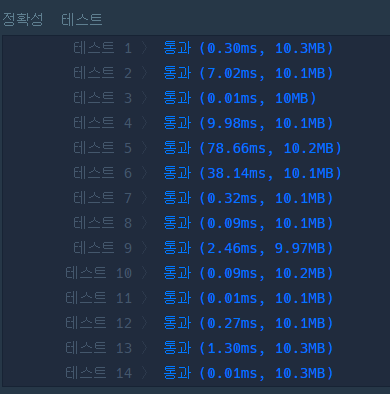

In [60]:
from collections import deque

def solution(bridge_length, weight, truck_weights):
    truck_weights = deque(truck_weights)
    
    cur = 1
    on_bridge = [truck_weights.popleft()]
    arrived = [cur+bridge_length]
    while truck_weights:
        cur += 1
        if cur == arrived[0]:
            arrived.pop(0)
            on_bridge.pop(0)
        print(f"현재: {cur}초, 건너고 있는 차량: {on_bridge}, 남은 차량: {truck_weights}")
        if weight >= sum(on_bridge) + truck_weights[0]:
            on_bridge += [truck_weights.popleft()]
            arrived += [cur+bridge_length]
    print(arrived)
    return cur if not arrived else arrived.pop()

In [61]:
bridge_length = 2
weight = 10
truck_weights = [7, 4,5,6]
solution(bridge_length, weight, truck_weights)

현재: 2초, 건너고 있는 차량: [7], 남은 차량: deque([4, 5, 6])
현재: 3초, 건너고 있는 차량: [], 남은 차량: deque([4, 5, 6])
현재: 4초, 건너고 있는 차량: [4], 남은 차량: deque([5, 6])
현재: 5초, 건너고 있는 차량: [5], 남은 차량: deque([6])
현재: 6초, 건너고 있는 차량: [], 남은 차량: deque([6])
[8]


8

In [62]:
bridge_length = 100
weight = 100
truck_weights = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
solution(bridge_length, weight, truck_weights)

현재: 2초, 건너고 있는 차량: [10], 남은 차량: deque([10, 10, 10, 10, 10, 10, 10, 10, 10])
현재: 3초, 건너고 있는 차량: [10, 10], 남은 차량: deque([10, 10, 10, 10, 10, 10, 10, 10])
현재: 4초, 건너고 있는 차량: [10, 10, 10], 남은 차량: deque([10, 10, 10, 10, 10, 10, 10])
현재: 5초, 건너고 있는 차량: [10, 10, 10, 10], 남은 차량: deque([10, 10, 10, 10, 10, 10])
현재: 6초, 건너고 있는 차량: [10, 10, 10, 10, 10], 남은 차량: deque([10, 10, 10, 10, 10])
현재: 7초, 건너고 있는 차량: [10, 10, 10, 10, 10, 10], 남은 차량: deque([10, 10, 10, 10])
현재: 8초, 건너고 있는 차량: [10, 10, 10, 10, 10, 10, 10], 남은 차량: deque([10, 10, 10])
현재: 9초, 건너고 있는 차량: [10, 10, 10, 10, 10, 10, 10, 10], 남은 차량: deque([10, 10])
현재: 10초, 건너고 있는 차량: [10, 10, 10, 10, 10, 10, 10, 10, 10], 남은 차량: deque([10])
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


110

### [삼각 달팽이](https://school.programmers.co.kr/learn/courses/30/lessons/68645)

In [47]:
from collections import deque

def solution(n):
    targets = {x+1:[x+1]+[0]*x for x in range(n)}
    cur = 'bottom'
    top, bottom = 2, n
    up_cnt, down_cnt = 1, 1
    last_num = sum([y for y in range(1, n+1)])
    numbers = deque([z for z in range(n+1, last_num+1)])
    while numbers:
        if cur == 'bottom': # 현재 제일 마지막
            print(f'\n{bottom=}, {down_cnt=}, {up_cnt=}')
            # targets[bottom][down_cnt] = numbers.popleft()
            for i in range(down_cnt, bottom-up_cnt+1):
                if targets[bottom][i] == 0:
                    targets[bottom][i] = numbers.popleft()
            cur = 'up'
            bottom -= 1
            print("after bottom process:", targets)
            # if bottom <= 3:
            #     break
        elif cur == 'up': # 올라가는 중
            for i in range(bottom, top-1, -1):
                targets[i][-up_cnt] = numbers.popleft()
            up_cnt += 1
            top += 1
            cur = 'down'
            print("after up process:", targets)
        elif cur == 'down': # 내려가는 중
            print(f'{top=}, {bottom=}, {down_cnt=}')
            for i in range(top, bottom+1):
                targets[i][down_cnt] = numbers.popleft()
            down_cnt += 1
            # bottom -= 1
            cur = 'bottom'
            print("after down process:", targets)
        
        print(f'{top=}, {bottom=}')
    print(targets)

In [108]:
from collections import deque

def solution(n):
    targets = {x+1:[x+1]+[0]*x for x in range(n)}
    cur = 'bottom'
    top, bottom = 2, n
    up_cnt, down_cnt = 1, 1
    last_num = sum([y for y in range(1, n+1)])
    numbers = deque([z for z in range(n+1, last_num+1)])
    while numbers:
        if cur == 'bottom': # 현재 제일 마지막
            # targets[bottom][down_cnt] = numbers.popleft()
            for i in range(down_cnt, bottom-up_cnt+1):
                if targets[bottom][i] == 0:
                    targets[bottom][i] = numbers.popleft()
            cur = 'up'
            bottom -= 1
            print("after bottom process:", targets)
        elif cur == 'up': # 올라가는 중
            print(f'{bottom=}, {top=}, {up_cnt=}, {down_cnt=}')
            for i in range(bottom, top-1, -1):
                targets[i][-up_cnt] = numbers.popleft()
            up_cnt += 1
            top += 2
            cur = 'down'
            print("after up process:", targets)
        elif cur == 'down': # 내려가는 중
            for i in range(top-1, bottom+1):
                targets[i][down_cnt] = numbers.popleft()
            down_cnt += 1
            cur = 'bottom'
            print("after down process:", targets)
        if top > bottom+1:
            break
    print(targets)

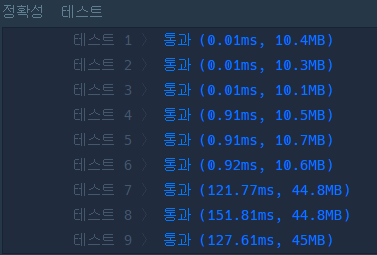

In [124]:
from collections import deque

def solution(n):
    targets = {x+1:[x+1]+[0]*x for x in range(n)}
    cur = 'bottom'
    top, bottom = 2, n
    up_cnt, down_cnt = 1, 1
    last_num = sum([y for y in range(1, n+1)])
    numbers = deque([z for z in range(n+1, last_num+1)])
    while numbers:
        if cur == 'bottom': # 현재 제일 마지막
            # targets[bottom][down_cnt] = numbers.popleft()
            for i in range(down_cnt, bottom-up_cnt+1):
                if targets[bottom][i] == 0:
                    targets[bottom][i] = numbers.popleft()
            cur = 'up'
            bottom -= 1
        elif cur == 'up': # 올라가는 중
            for i in range(bottom, top-1, -1):
                targets[i][-up_cnt] = numbers.popleft()
            up_cnt += 1
            top += 2
            cur = 'down'
        elif cur == 'down': # 내려가는 중
            for i in range(top-1, bottom+1):
                targets[i][down_cnt] = numbers.popleft()
            down_cnt += 1
            cur = 'bottom'
    answer = []
    for i in range(1, n+1):
        answer += targets[i]
    return answer

- itertools의 chain 모듈을 활용해 좀 더 빠른 속도와 더 적은 메모리 사용량 적용

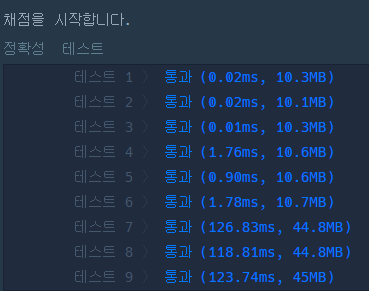

In [137]:
from collections import deque
from itertools import chain

def solution(n):
    targets = {x+1:[x+1]+[0]*x for x in range(n)}
    cur = 'bottom'
    top, bottom = 2, n
    up_cnt, down_cnt = 1, 1
    last_num = sum([y for y in range(1, n+1)])
    numbers = deque([z for z in range(n+1, last_num+1)])
    while numbers:
        if cur == 'bottom': # 현재 제일 마지막
            # targets[bottom][down_cnt] = numbers.popleft()
            for i in range(down_cnt, bottom-up_cnt+1):
                if targets[bottom][i] == 0:
                    targets[bottom][i] = numbers.popleft()
            cur = 'up'
            bottom -= 1
        elif cur == 'up': # 올라가는 중
            for i in range(bottom, top-1, -1):
                targets[i][-up_cnt] = numbers.popleft()
            up_cnt += 1
            top += 2
            cur = 'down'
        elif cur == 'down': # 내려가는 중
            for i in range(top-1, bottom+1):
                targets[i][down_cnt] = numbers.popleft()
            down_cnt += 1
            cur = 'bottom'
    return list(chain(*targets.values()))

In [138]:
solution(6)

[1, 2, 15, 3, 16, 14, 4, 17, 21, 13, 5, 18, 19, 20, 12, 6, 7, 8, 9, 10, 11]

In [126]:
solution(3)

{1: [1], 2: [2, 6], 3: [3, 4, 5]}


[1, 2, 6, 3, 4, 5]

In [127]:
solution(4)

{1: [1], 2: [2, 9], 3: [3, 10, 8], 4: [4, 5, 6, 7]}


[1, 2, 9, 3, 10, 8, 4, 5, 6, 7]

In [128]:
solution(5)

{1: [1], 2: [2, 12], 3: [3, 13, 11], 4: [4, 14, 15, 10], 5: [5, 6, 7, 8, 9]}


[1, 2, 12, 3, 13, 11, 4, 14, 15, 10, 5, 6, 7, 8, 9]

### [큰 수 만들기](https://school.programmers.co.kr/learn/courses/30/lessons/42883)

In [ ]:
from itertools import combinations

def solution(number, k):
    number = [x for x in number]
    numbers = [str("".join(y)) for y in combinations(number, len(number)-k)]
    numbers.sort()
    return numbers[-1]

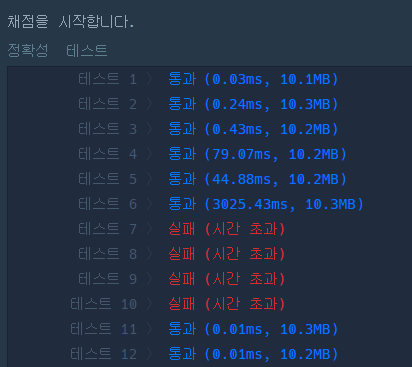

In [133]:
from itertools import combinations

def solution(number, k):
    answer_len = len(number) - k
    numbers = [x for x in number]
    max_idx = numbers.index(max(numbers))
    answer = ''
    while True:
        target_len = len(answer) + len(numbers) - max_idx
        if target_len < answer_len:
            cur_max = max(numbers)
            while True:
                cur_max = max([x for x in numbers if x < cur_max])
                max_idx = numbers.index(cur_max)
                if len(answer)+len(numbers[max_idx:]) >= answer_len:
                    break
        elif target_len >= answer_len:
            answer += numbers[max_idx]
            if len(answer) == answer_len:
                return answer
            numbers = numbers[max_idx+1:]
            max_idx = numbers.index(max(numbers))                        

In [224]:
def solution(number, k):
    answer = ""
    for num in number:
        if not answer:
            answer += num
            continue
        
        while answer[-1] < num and k > 0:
            answer = answer[:-1]
            k -= 1
            if not answer or k == 0:
                break
        answer += num
        print(f"{answer=}, {num=}")
        if len(answer) == len(number) - k:
            break
    return answer
        

In [225]:
number = "1231234"
k = 3
solution(number, k)

answer='2', num='2'
answer='3', num='3'
answer='31', num='1'
answer='32', num='2'
answer='323', num='3'
answer='3234', num='4'


'3234'

In [226]:
number = "1924"
k = 2
solution(number, k)

answer='9', num='9'
answer='92', num='2'
answer='94', num='4'


'94'

In [227]:
number = "4177252841"
k = 4
solution(number, k)

answer='41', num='1'
answer='7', num='7'
answer='77', num='7'
answer='772', num='2'
answer='775', num='5'
answer='7752', num='2'
answer='7758', num='8'
answer='77584', num='4'
answer='775841', num='1'


'775841'